### Text Mining from Social Media
- *natural language processing (NLP)*: processing of "natural language" (language used by humans); helps computer understand this language
    - ie, Keyword Search, Information Extraction, Advertisement Search, Sentimental Analysis, Speech Recognition, Chatbot, Machine Translation

#### Scraping Text from Twitter

In [1]:
# Import the snscrape library - used `pip install snscrape` to get the library 
import snscrape.modules.twitter as sntwitter # twitter api for getting tweets
import pandas as pd

In [2]:
# Write queries to download tweets and save them in a DataFrame
# Get a single tweet by keyword
query = "tesla"
for tweet in sntwitter.TwitterSearchScraper(query).get_items(): # get tweet items from the library
    print(tweet)
    break # gets only one tweet instead of all
# This returns the url of the tweet as an object

https://twitter.com/SaikyoRyu/status/1590383084729683968


In [3]:
# Print the attributes of a tweet
print(vars(tweet)) # This returns the attributes of a tweet object 
# vars() : The method returns the __dict__ attribute for a module, 
# class, instance, or any other object if the same has a __dict__ attribute.

{'url': 'https://twitter.com/SaikyoRyu/status/1590383084729683968', 'date': datetime.datetime(2022, 11, 9, 16, 37, 29, tzinfo=datetime.timezone.utc), 'content': '@relishedmin if i get another checkmark tattoo on my body somewhere i complete my twitter brain chip (installed by tesla) weekly quest to get 50 TwitPoints which means i’ll finally have enough to buy a hat for my #verified #official tetrahedron nft icon', 'renderedContent': '@relishedmin if i get another checkmark tattoo on my body somewhere i complete my twitter brain chip (installed by tesla) weekly quest to get 50 TwitPoints which means i’ll finally have enough to buy a hat for my #verified #official tetrahedron nft icon', 'id': 1590383084729683968, 'user': User(username='SaikyoRyu', id=3280222297, displayname='📺sadako from REAL LIFE !!📼', description="touching my dick on frankenstein's day 23/just a little guy", rawDescription="touching my dick on frankenstein's day 23/just a little guy", descriptionUrls=None, verified=Fal

In [4]:
# gwt attributes and save to a list
query = "tesla"
tweets = []
for tweet in sntwitter.TwitterSearchScraper(query).get_items(): # get tweet items from the library
    tweets.append([tweet.date, tweet.content, tweet.retweetCount])
    break
print(tweets)

[[datetime.datetime(2022, 11, 9, 16, 37, 29, tzinfo=datetime.timezone.utc), '@relishedmin if i get another checkmark tattoo on my body somewhere i complete my twitter brain chip (installed by tesla) weekly quest to get 50 TwitPoints which means i’ll finally have enough to buy a hat for my #verified #official tetrahedron nft icon', 0]]


In [5]:
# Download multiple tweets and save to a DataFrame
query = "tesla"
tweet_list = []
n = 5

for tweet in sntwitter.TwitterSearchScraper(query).get_items():
    if len(tweet_list) == n:
        break
    else:
        tweet_list.append([tweet.date, tweet.user.username, tweet.content, tweet.retweetCount])

df = pd.DataFrame(tweet_list, columns = ['date', 'user', 'content', 'retweeted count'])
print(df)

                       date           user  \
0 2022-11-09 16:37:29+00:00      SaikyoRyu   
1 2022-11-09 16:37:26+00:00       stdwanze   
2 2022-11-09 16:37:24+00:00  LotharBirkner   
3 2022-11-09 16:37:23+00:00          Cj01J   
4 2022-11-09 16:37:23+00:00      gizaglass   

                                             content  retweeted count  
0  @relishedmin if i get another checkmark tattoo...                0  
1  @bayl Naja, in einigen Monaten den Platzhirsch...                0  
2  Musk’s personal fortune stands at $197 billion...                0  
3  @bennybob60 @lopezlinette @elonmusk @BusinessI...                0  
4  i am going to kill myself so my spirit could p...                0  


#### 4. Use Advanced Search to write complex search conditions
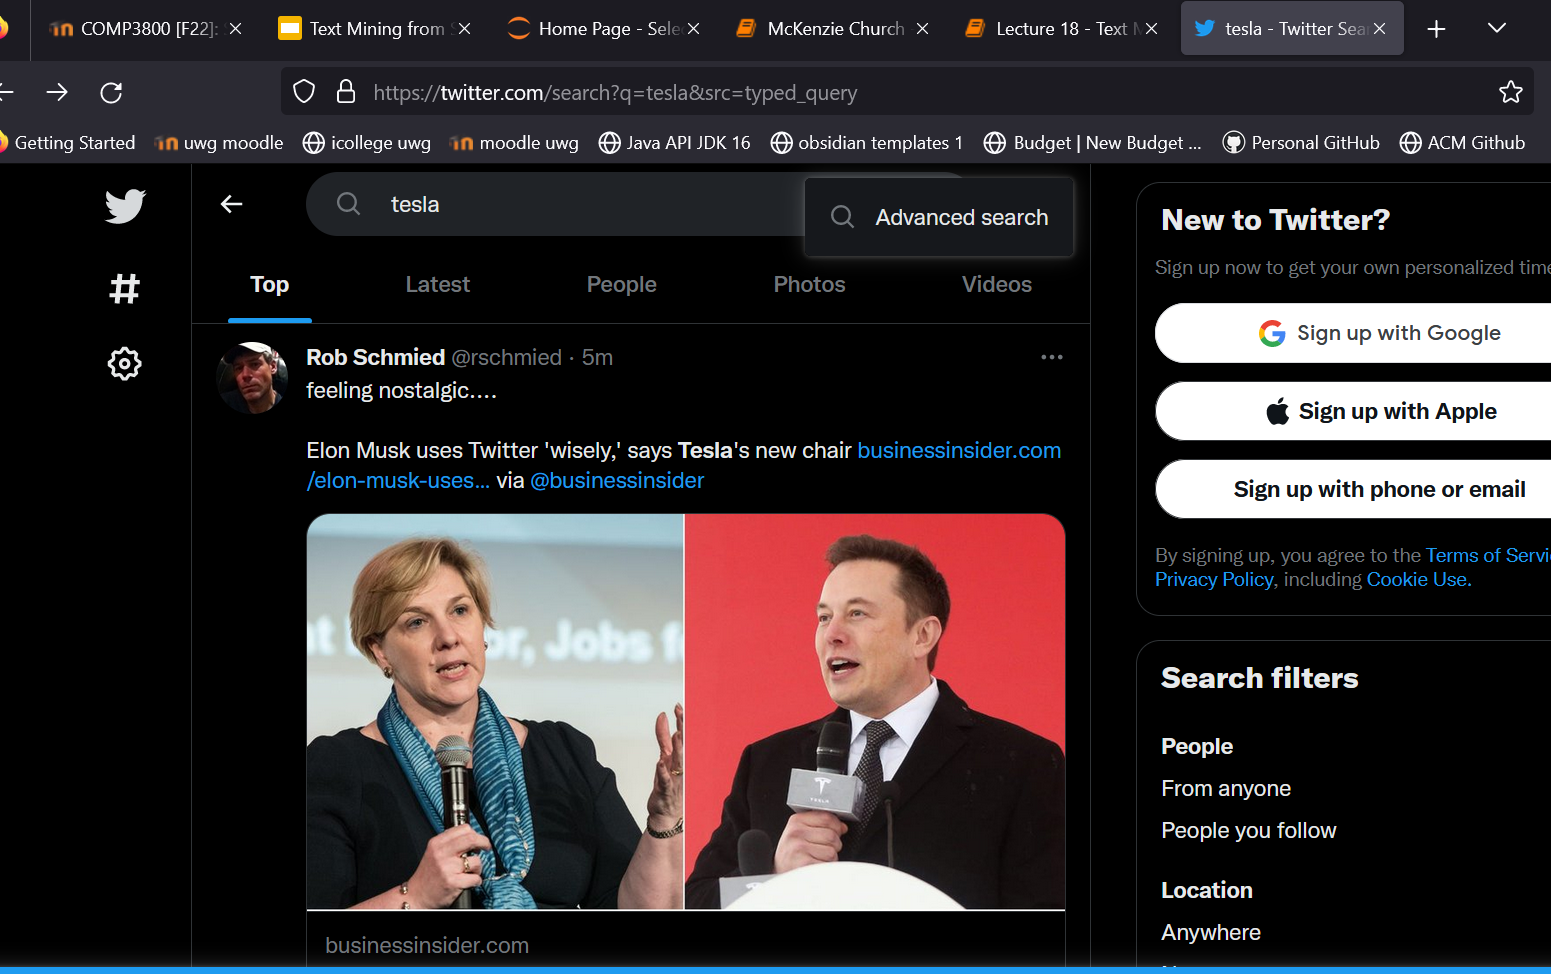
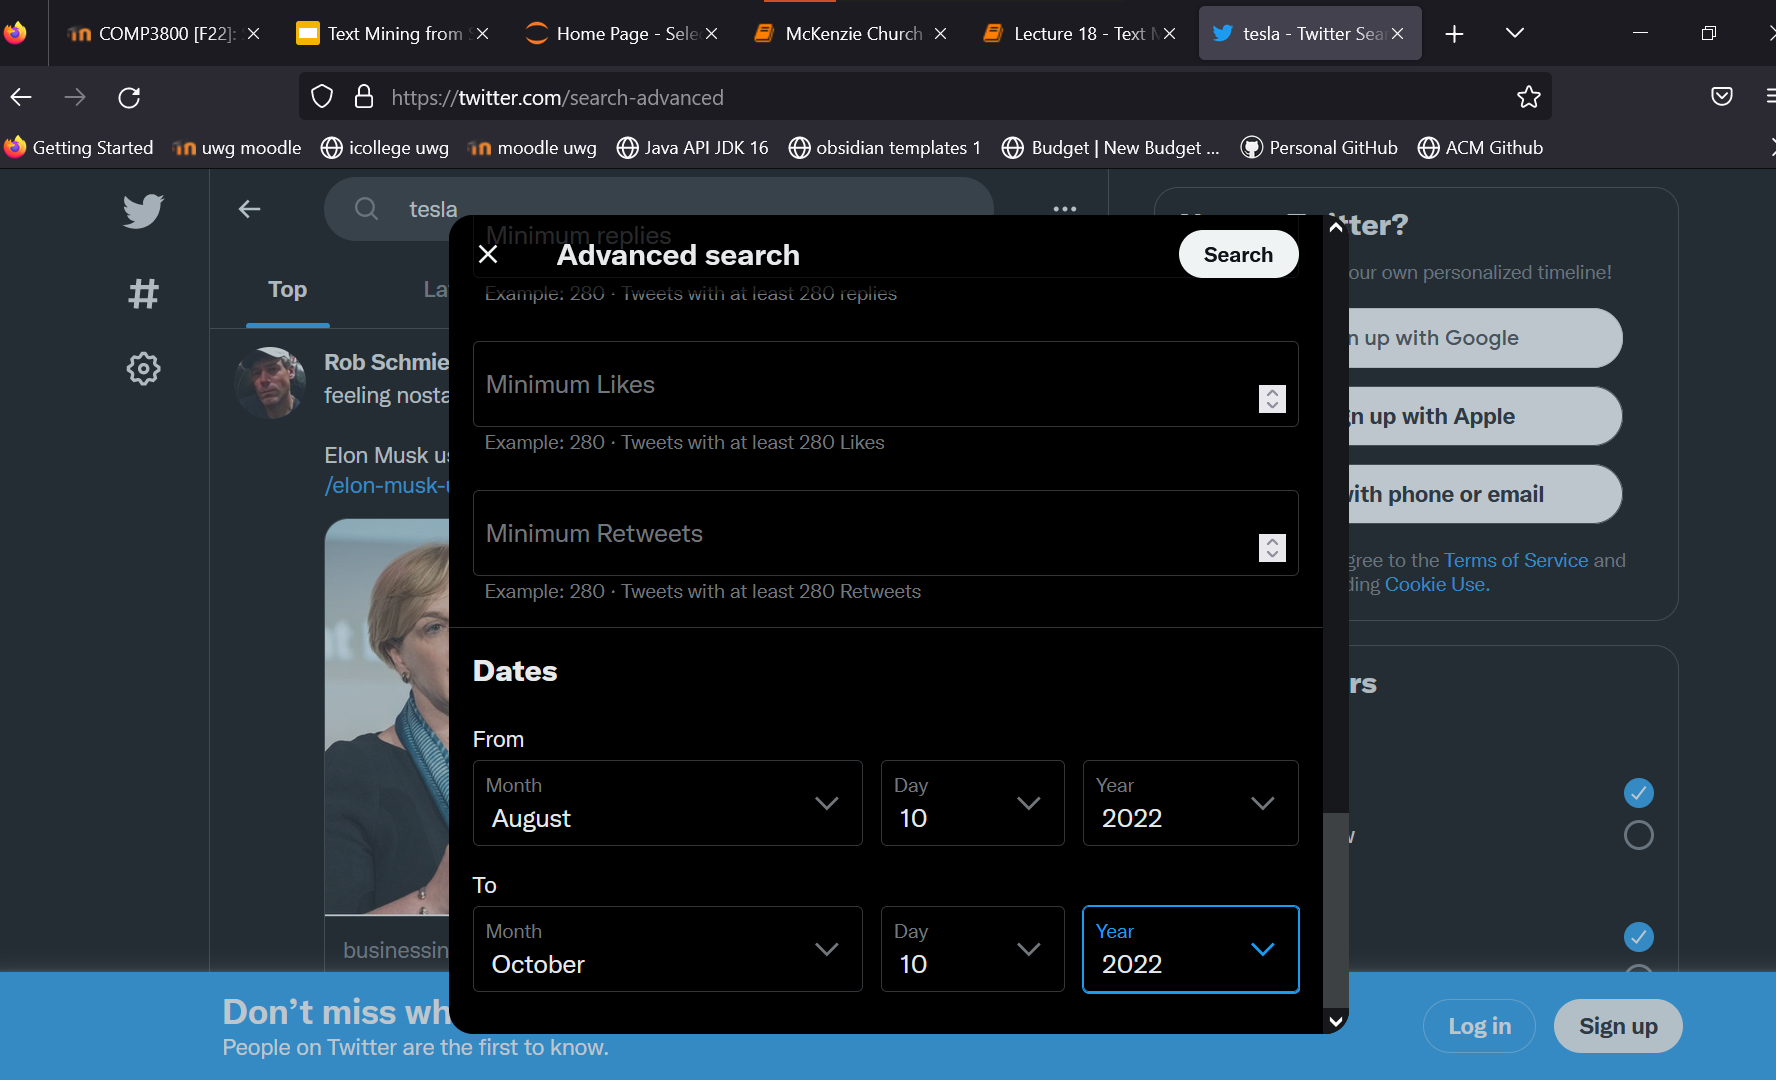

**copy the query**
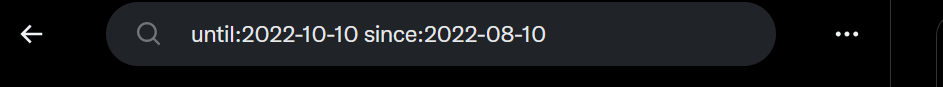

In [6]:
# Use the query sentence to download the tweets. 

# find all tweets from Taylor Swift from January 01, 2021 to November 06, 2022
query = "(from:taylorswift13) until:2022-11-06 since:2021-1-01"
tweets = []
limit = 5000 # limit on num of tweets to return

for tweet in sntwitter.TwitterSearchScraper(query).get_items():
    if len(tweets) == limit:
        break
    else:
        tweets.append([tweet.date, tweet.user.username, tweet.content])
        
df = pd.DataFrame(tweets, columns=['Date', 'User', 'Tweet'])
print(df)

                         Date           User  \
0   2022-11-04 13:00:22+00:00  taylorswift13   
1   2022-11-01 12:24:21+00:00  taylorswift13   
2   2022-11-01 12:24:20+00:00  taylorswift13   
3   2022-10-31 17:54:24+00:00  taylorswift13   
4   2022-10-27 18:05:57+00:00  taylorswift13   
..                        ...            ...   
128 2021-02-04 05:18:25+00:00  taylorswift13   
129 2021-01-28 05:11:02+00:00  taylorswift13   
130 2021-01-21 22:55:57+00:00  taylorswift13   
131 2021-01-08 14:04:04+00:00  taylorswift13   
132 2021-01-08 14:04:04+00:00  taylorswift13   

                                                 Tweet  
0    UM. Looks like I’ll get to see more of your be...  
1    Feeling like the luckiest person alive to get ...  
2    I’m enchanted to announce my next tour: Taylor...  
3    10 out of 10 of the Hot 100??? On my 10th albu...  
4    Can I ask you a question… did you ever wonder ...  
..                                                 ...  
128  In my mind all of t

### Exploratory Data Analysis
(examples)
- Frequency of user's posts
- Top retweeted posts
- Length of user's posts
- Preferred posting time during the day

In [7]:
# combine tweets into one list
df1 = df['Tweet']

all_sentences = []
for sentence in df1:
    all_sentences.append(sentence)

print(all_sentences)  # this returns a list with each sentence as an element

['UM. Looks like I’ll get to see more of your beautiful faces than previously expected… we’re adding 8 shows to the tour 😆\n\nhttps://t.co/KFuqvr0hhO https://t.co/4LTYSnwKJO', 'Feeling like the luckiest person alive to get to take these brilliant artists out on tour w/ me: @paramore, @beabad00bee, @phoebe_bridgers, @_girlinred_, @whereisMUNA, @HAIMtheband, @gracieabrams, @whoisgayle &amp; @OwennMusic. I can’t WAIT to see you. It’s been a long time coming 🥰', 'I’m enchanted to announce my next tour: Taylor Swift | The Eras Tour, a journey through the musical eras of my career (past &amp; present!) The first leg of the tour will be in stadiums across the US, with international dates to be announced as soon as we can!\nhttps://t.co/KFuqvrhSGo https://t.co/eVyTcuW8sK', '10 out of 10 of the Hot 100??? On my 10th album??? I AM IN SHAMBLES. https://t.co/q1n5Zc6pYA', 'Can I ask you a question… did you ever wonder who was responsible for those immaculate crowd vocals?\n\nQuestion…? and Bejewele

In [8]:
sentences = " ".join(all_sentences)     # Put these sentences into a string
sentences

'UM. Looks like I’ll get to see more of your beautiful faces than previously expected… we’re adding 8 shows to the tour 😆\n\nhttps://t.co/KFuqvr0hhO https://t.co/4LTYSnwKJO Feeling like the luckiest person alive to get to take these brilliant artists out on tour w/ me: @paramore, @beabad00bee, @phoebe_bridgers, @_girlinred_, @whereisMUNA, @HAIMtheband, @gracieabrams, @whoisgayle &amp; @OwennMusic. I can’t WAIT to see you. It’s been a long time coming 🥰 I’m enchanted to announce my next tour: Taylor Swift | The Eras Tour, a journey through the musical eras of my career (past &amp; present!) The first leg of the tour will be in stadiums across the US, with international dates to be announced as soon as we can!\nhttps://t.co/KFuqvrhSGo https://t.co/eVyTcuW8sK 10 out of 10 of the Hot 100??? On my 10th album??? I AM IN SHAMBLES. https://t.co/q1n5Zc6pYA Can I ask you a question… did you ever wonder who was responsible for those immaculate crowd vocals?\n\nQuestion…? and Bejeweled instrumenta

### Use RegEx for Keyword Search

In [9]:
# Who do Taylor Swift call out to in her tweets?
# Find all the @* from the string
import re

# using regex to find
callouts = re.findall(r'@[a-zA-Z0-9_*]+', sentences)
print(callouts)

['@paramore', '@beabad00bee', '@phoebe_bridgers', '@_girlinred_', '@whereisMUNA', '@HAIMtheband', '@gracieabrams', '@whoisgayle', '@OwennMusic', '@jackantonoff', '@rachelantonoff', '@dylanobrien', '@austinswift7', '@HAIMtheband', '@LauraDern', '@DitaVonTeese', '@patmcgrathreal', '@jackantonoff', '@JanetJackson', '@birbigs', '@bejohnce', '@meellisday', '@The_RinaYang', '@sam_dew', '@sounwave', '@Jahaansweet', '@thekeanubeats', '@ZoeKravitz', '@Sharp_Stick', '@jackantonoff', '@amazonmusic', '@primevideo', '@AaronDessner', '@DamonAlbarn', '@aaron_dessner', '@jackantonoff', '@Sharp_Stick', '@rowedizzle', '@lizrose06', '@GettyImages', '@aaron_dessner', '@heyjonlow', '@Miles_Teller', '@keleighteller', '@blakelively', '@blakelively', '@nbcsnl', '@the_rinayang', '@SadieSink', '@dylanobrien', '@arloparks', '@MercuryPrize', '@halsey', '@aaron_dessner', '@BRMadjv', '@ChrisStapleton', '@phoebe_bridgers', '@mistersmims', '@edsheeran', '@Aaron_Dessner', '@BRMadjv', '@benstafford100', '@alltaywell1',

In [10]:
# Count the frequencies of these mentioned names
import collections
freqs = collections.Counter(callouts) # method from collections library
print(freqs)

Counter({'@jackantonoff': 4, '@aaron_dessner': 3, '@MarenMorris': 3, '@phoebe_bridgers': 2, '@HAIMtheband': 2, '@dylanobrien': 2, '@Sharp_Stick': 2, '@amazonmusic': 2, '@blakelively': 2, '@BRMadjv': 2, '@Olivia_Rodrigo': 2, '@KeithUrban': 2, '@paramore': 1, '@beabad00bee': 1, '@_girlinred_': 1, '@whereisMUNA': 1, '@gracieabrams': 1, '@whoisgayle': 1, '@OwennMusic': 1, '@rachelantonoff': 1, '@austinswift7': 1, '@LauraDern': 1, '@DitaVonTeese': 1, '@patmcgrathreal': 1, '@JanetJackson': 1, '@birbigs': 1, '@bejohnce': 1, '@meellisday': 1, '@The_RinaYang': 1, '@sam_dew': 1, '@sounwave': 1, '@Jahaansweet': 1, '@thekeanubeats': 1, '@ZoeKravitz': 1, '@primevideo': 1, '@AaronDessner': 1, '@DamonAlbarn': 1, '@rowedizzle': 1, '@lizrose06': 1, '@GettyImages': 1, '@heyjonlow': 1, '@Miles_Teller': 1, '@keleighteller': 1, '@nbcsnl': 1, '@the_rinayang': 1, '@SadieSink': 1, '@arloparks': 1, '@MercuryPrize': 1, '@halsey': 1, '@ChrisStapleton': 1, '@mistersmims': 1, '@edsheeran': 1, '@Aaron_Dessner': 1, 

### Information Extraction
- get familiar w/ data cleaning steps for textual data
- extract **useful** info from the data, ie frequency of words, named entity recognition, etc.

#### Step 1. Tokenization (somewhat like data cleaning)
- Break a complex sentence into words.
- Understand the importance of each of the words with respect.
- Produce a structural description on an input sentence.
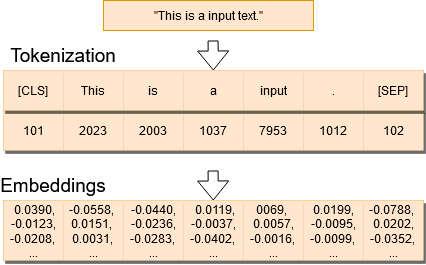

In [11]:
# import library for tokens
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

# return list of all words and break w/ space
tweets_tokens = word_tokenize(sentences)
print(tweets_tokens)

# notice this list includes a lot of random punctuation for an entry

['UM', '.', 'Looks', 'like', 'I', '’', 'll', 'get', 'to', 'see', 'more', 'of', 'your', 'beautiful', 'faces', 'than', 'previously', 'expected…', 'we', '’', 're', 'adding', '8', 'shows', 'to', 'the', 'tour', '😆', 'https', ':', '//t.co/KFuqvr0hhO', 'https', ':', '//t.co/4LTYSnwKJO', 'Feeling', 'like', 'the', 'luckiest', 'person', 'alive', 'to', 'get', 'to', 'take', 'these', 'brilliant', 'artists', 'out', 'on', 'tour', 'w/', 'me', ':', '@', 'paramore', ',', '@', 'beabad00bee', ',', '@', 'phoebe_bridgers', ',', '@', '_girlinred_', ',', '@', 'whereisMUNA', ',', '@', 'HAIMtheband', ',', '@', 'gracieabrams', ',', '@', 'whoisgayle', '&', 'amp', ';', '@', 'OwennMusic', '.', 'I', 'can', '’', 't', 'WAIT', 'to', 'see', 'you', '.', 'It', '’', 's', 'been', 'a', 'long', 'time', 'coming', '🥰', 'I', '’', 'm', 'enchanted', 'to', 'announce', 'my', 'next', 'tour', ':', 'Taylor', 'Swift', '|', 'The', 'Eras', 'Tour', ',', 'a', 'journey', 'through', 'the', 'musical', 'eras', 'of', 'my', 'career', '(', 'past',

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mcken\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [12]:
print(len(tweets_tokens))

4437


#### Step #2: Removing Punctuations
- we just want to get the actual words, without punctuation

In [13]:
import re
tweets_tokens = [re.sub(r'[^A-Za-z0-9]+', '', x) for x in tweets_tokens]

words_no_punc = []

for word in tweets_tokens:
    if word != '':
        words_no_punc.append(word)
print(words_no_punc)

['UM', 'Looks', 'like', 'I', 'll', 'get', 'to', 'see', 'more', 'of', 'your', 'beautiful', 'faces', 'than', 'previously', 'expected', 'we', 're', 'adding', '8', 'shows', 'to', 'the', 'tour', 'https', 'tcoKFuqvr0hhO', 'https', 'tco4LTYSnwKJO', 'Feeling', 'like', 'the', 'luckiest', 'person', 'alive', 'to', 'get', 'to', 'take', 'these', 'brilliant', 'artists', 'out', 'on', 'tour', 'w', 'me', 'paramore', 'beabad00bee', 'phoebebridgers', 'girlinred', 'whereisMUNA', 'HAIMtheband', 'gracieabrams', 'whoisgayle', 'amp', 'OwennMusic', 'I', 'can', 't', 'WAIT', 'to', 'see', 'you', 'It', 's', 'been', 'a', 'long', 'time', 'coming', 'I', 'm', 'enchanted', 'to', 'announce', 'my', 'next', 'tour', 'Taylor', 'Swift', 'The', 'Eras', 'Tour', 'a', 'journey', 'through', 'the', 'musical', 'eras', 'of', 'my', 'career', 'past', 'amp', 'present', 'The', 'first', 'leg', 'of', 'the', 'tour', 'will', 'be', 'in', 'stadiums', 'across', 'the', 'US', 'with', 'international', 'dates', 'to', 'be', 'announced', 'as', 'soon

In [14]:
print(len(words_no_punc))

3507


#### Step #3: Removing Stopwords
- *stop words*: set of commonly used words in any language
    - ie, English is "the", "is", "and"
    - used to eliminate **unimportant words** -> allows fous on important words for better context identification

In [15]:
# remove empty elements from words_no_punc

import nltk
nltk.download('stopwords')
# stopwords library
from nltk.corpus import stopwords

stop_words = set(stopwords.words("english")) 
# this loads a set of the stopwords library based on language

words_no_stopwords = []

# search the list of words and take out the non-stopwords
for word in words_no_punc:
    if word.casefold() not in stop_words:   #.casefold(), similar to .lower().
        words_no_stopwords.append(word)

print(words_no_stopwords)

['UM', 'Looks', 'like', 'get', 'see', 'beautiful', 'faces', 'previously', 'expected', 'adding', '8', 'shows', 'tour', 'https', 'tcoKFuqvr0hhO', 'https', 'tco4LTYSnwKJO', 'Feeling', 'like', 'luckiest', 'person', 'alive', 'get', 'take', 'brilliant', 'artists', 'tour', 'w', 'paramore', 'beabad00bee', 'phoebebridgers', 'girlinred', 'whereisMUNA', 'HAIMtheband', 'gracieabrams', 'whoisgayle', 'amp', 'OwennMusic', 'WAIT', 'see', 'long', 'time', 'coming', 'enchanted', 'announce', 'next', 'tour', 'Taylor', 'Swift', 'Eras', 'Tour', 'journey', 'musical', 'eras', 'career', 'past', 'amp', 'present', 'first', 'leg', 'tour', 'stadiums', 'across', 'US', 'international', 'dates', 'announced', 'soon', 'https', 'tcoKFuqvrhSGo', 'https', 'tcoeVyTcuW8sK', '10', '10', 'Hot', '100', '10th', 'album', 'SHAMBLES', 'https', 'tcoq1n5Zc6pYA', 'ask', 'question', 'ever', 'wonder', 'responsible', 'immaculate', 'crowd', 'vocals', 'Question', 'Bejeweled', 'instrumental', 'versions', 'available', 'https', 'tcoWdrCmvLHyA

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mcken\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
print(len(words_no_stopwords))
# notice the difference btwn the list size from before we removed stop words

1877


#### Step #4: Stemming
- normalize words into its base form or root (lemma)
- remove words that have the same meaning (ie, changing and changed have same meaning)
- a part of the word is just chopped off at the tail end to arrive at the stem of the word.

- may create an issue since the algorithm doesn't know the meaning of the word in the language it belongs to
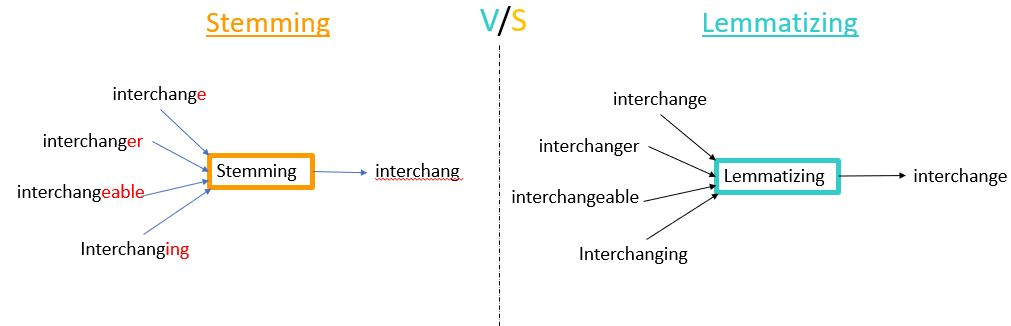

#### Example 1: Stemming
- *snowball stemmer* (Porter2 stemming algorithm): stemming algorithm 

In [17]:
# import stem library
from nltk.stem.snowball import SnowballStemmer
s_stemmer = SnowballStemmer(language='english')  # load the algorithm w/ language to use

# list of sample words to use as base
sample_words = ['teach', 'teaching', 'taught', 'teacher', 'teaches']

# new list to create of words w/ similar words removed
new = []
for word in sample_words:
    new.append(s_stemmer.stem(word))

print(new) # list of unstemmed words - removes words with similar meaning

['teach', 'teach', 'taught', 'teacher', 'teach']


In [18]:
# tweet example of stemming - take out words w/ similar meanings then create new list of result
words_stemmed = []
for word in words_no_stopwords:
    words_stemmed.append(s_stemmer.stem(word))
    
print(words_stemmed)

['um', 'look', 'like', 'get', 'see', 'beauti', 'face', 'previous', 'expect', 'ad', '8', 'show', 'tour', 'https', 'tcokfuqvr0hho', 'https', 'tco4ltysnwkjo', 'feel', 'like', 'luckiest', 'person', 'aliv', 'get', 'take', 'brilliant', 'artist', 'tour', 'w', 'paramor', 'beabad00be', 'phoebebridg', 'girlinr', 'whereismuna', 'haimtheband', 'gracieabram', 'whoisgayl', 'amp', 'owennmus', 'wait', 'see', 'long', 'time', 'come', 'enchant', 'announc', 'next', 'tour', 'taylor', 'swift', 'era', 'tour', 'journey', 'music', 'era', 'career', 'past', 'amp', 'present', 'first', 'leg', 'tour', 'stadium', 'across', 'us', 'intern', 'date', 'announc', 'soon', 'https', 'tcokfuqvrhsgo', 'https', 'tcoevytcuw8sk', '10', '10', 'hot', '100', '10th', 'album', 'shambl', 'https', 'tcoq1n5zc6pya', 'ask', 'question', 'ever', 'wonder', 'respons', 'immacul', 'crowd', 'vocal', 'question', 'bejewel', 'instrument', 'version', 'avail', 'https', 'tcowdrcmvlhya', 'jackantonoff', 'rachelantonoff', 'dylanobrien', 'austinswift7', '

In [19]:
# size of tweet words w/o stems/extra words included
print(len(words_stemmed))

1877


#### Example 2: Lemmatization
- this algorithm has knowledge of the meaning of the root words in the language that it belongs to -> understands the use of the word before trimming to determine if trimming is useful or not
- ie, a lemmatization algorithm would know that the word better is derived from the word good, and hence, the lemme is good

In [20]:
# Lemmatization
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('omw-1.4')
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

sample_words = ['teach', 'teaching', 'taught', 'teacher', 'teaches']

new2 = []

for word in sample_words:
    new2.append(lemmatizer.lemmatize(word, pos='v'))

print(new2)

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\mcken\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mcken\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


['teach', 'teach', 'teach', 'teacher', 'teach']


In [21]:
# tweet example - PorterStemmer does this but w/o context
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()
stop_words = set(nltk.corpus.stopwords.words('english'))
words_lemm = []

def lemmatize(tweet):
    ' '.join([lemmatizer.lemmatize(i, 'v')])
    for i in tweet:
        if i not in stop_words:
            words_lemm.append(stemmer.stem(words_no_stopwords))
print(words_lemm)
# needs research

[]


In [22]:
print(len(words_lemmatized))

NameError: name 'words_lemmatized' is not defined

#### Let's Compare the Size of the Tweet After Each Step

In [33]:
print("Before: Full Tweets into Senteces")
print(len(all_sentences))
print("\n")

print("Step 1: Tokenization - Sentences into Individual Words")
print(len(tweets_tokens))
print("\n")

print("Step 2: Removing Punctuations")
print(len(words_no_punc))
print("\n")

print("Step 3: Removing Stopwords")
print(len(words_no_stopwords))
print("\n")

print("Step 4: Example 1 - Stemming")
print(len(words_stemmed))
print("\n")

print("Step 4: Example 2 - Lemmatization")

Before: Full Tweets into Senteces
133


Step 1: Tokenization - Sentences into Individual Words
4437


Step 2: Removing Punctuations
3507


Step 3: Removing Stopwords
1877


Step 4: Example 1 - Stemming
1877


Step 4: Example 2 - Lemmatization


### Lecture Pt. 2

### Frequency Distribution

In [34]:
# Generate the frequency distribution of the words.
import pandas as pd 
import nltk 
from nltk import FreqDist

fdist2 = FreqDist(words_stemmed) # this returns a dictionary, so we must trnasform to a list, then to a dataframe
for key,value in fdist2.items():
    print(key, ':', value) # print the dictionary items w/ their keys to look at the word and their frequency

um : 1
look : 5
like : 15
get : 10
see : 5
beauti : 2
face : 2
previous : 2
expect : 2
ad : 1
8 : 1
show : 3
tour : 6
https : 125
tcokfuqvr0hho : 1
tco4ltysnwkjo : 1
feel : 10
luckiest : 1
person : 1
aliv : 1
take : 5
brilliant : 3
artist : 4
w : 1
paramor : 1
beabad00be : 1
phoebebridg : 2
girlinr : 1
whereismuna : 1
haimtheband : 2
gracieabram : 1
whoisgayl : 1
amp : 18
owennmus : 1
wait : 5
long : 5
time : 12
come : 3
enchant : 1
announc : 2
next : 4
taylor : 7
swift : 1
era : 4
journey : 2
music : 7
career : 1
past : 1
present : 1
first : 9
leg : 1
stadium : 1
across : 1
us : 9
intern : 1
date : 1
soon : 2
tcokfuqvrhsgo : 1
tcoevytcuw8sk : 1
10 : 4
hot : 5
100 : 2
10th : 1
album : 16
shambl : 2
tcoq1n5zc6pya : 1
ask : 1
question : 2
ever : 6
wonder : 3
respons : 1
immacul : 1
crowd : 1
vocal : 2
bejewel : 2
instrument : 1
version : 19
avail : 4
tcowdrcmvlhya : 1
jackantonoff : 4
rachelantonoff : 1
dylanobrien : 2
austinswift7 : 1
tcoab0cwjjhtr : 1
love : 17
guy : 6
much : 9
stay : 

In [35]:
# input the list, then create a dataframe with columns for each dictionary item type and their frequency
df_words = pd.DataFrame(list(fdist2.items()), columns = ["Word","Frequency"]) 

# sort the word frequencies from least to greatest
df_sorted = df_words.sort_values(by=['Frequency'], ascending=False)
df_sorted.head(10)

,Word,Frequency
13,https,125
181,song,20
76,version,19
32,amp,18
241,thank,17
84,love,17
63,album,16
2,like,15
111,midnight,15
279,one,14


#### Frequency Dist. Barplot

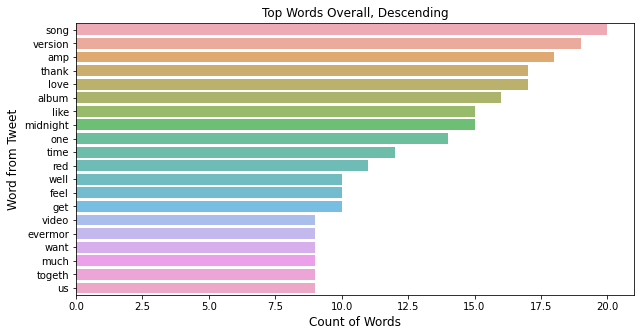

In [36]:
# Plot the frequencies
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))

# get all values for the words = x, get all values for the frequencies (range) = y
sns.barplot(x=df_sorted.iloc[1:21, 1], y=df_sorted.iloc[1:21, 0], alpha=0.8)
plt.title('Top Words Overall, Descending')
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()

# doesn't show all values because we just chose index 1 - 21 for word frequencies df

### Named Entity Recognition
- identification of key information in text and classify into set of predefined categories
    - step 1. detecting the entities from the text
    - step 2. classifying them into different categories

In [37]:
# Example on a sample text
import spacy
from spacy import displacy
import en_core_web_sm

EntityR = en_core_web_sm.load() # the algorithm

sample_text = "The Indian Space Research Organisation or is the national space agency of India, headquartered in Bengaluru. It operates under Department of Space which is directly overseen by the Prime Minister of India while Chairman of ISRO acts as executive of DOS as well."
result = EntityR(sample_text)   # this returns an object with attributes
print(result.ents) # print the entities from the sample text

C:\Users\mcken\anaconda3\lib\site-packages\spacy\language.py:1895: UserWarning: [W123] Argument disable with value [] is used instead of ['senter'] as specified in the config. Be aware that this might affect other components in your pipeline.
  warnings.warn(


(The Indian Space Research Organisation, India, Bengaluru, under Department of Space, India)


In [38]:
for word in result.ents:
    print(word.text, word.label_)

displacy.render(result,style="ent",jupyter=True) # shows each entity and its category

The Indian Space Research Organisation ORG
India GPE
Bengaluru GPE
under Department of Space ORG
India GPE


In [49]:
# example with our tweet
# apply NER on our project
result_NER = EntityR(sentences)

for word in result_NER.ents:
    print(word.text, word.label_)
# this result is odd since there are symbols in the tweet sentences

8 CARDINAL
@beabad00bee ORG
@HAIMtheband GPE
@whoisgayle & ORG
WAIT ORG
Taylor Swift PERSON
The Eras Tour ORG
first ORDINAL
US GPE
10 CARDINAL
10 CARDINAL
10th ORDINAL
@rachelantonoff @dylanobrien @austinswift7 PERSON
Love WORK_OF_ART
@HAIMtheband GPE
Midnights PERSON
🥲 ORG
https://t.co/7kDKDrBwiD PERSON
🙏 ORG
@meellisday DATE
@The_RinaYang ORG
🌌 ORG
🤩 ORG
3 CARDINAL
Vault ORG
3am TIME
Midnights PERSON
13 CARDINAL
mad hour TIME
magic 13 LAW
Midnights PERSON
Midnights PERSON
first ORDINAL
two CARDINAL
Lana Del Rey PERSON
@Jahaansweet ORG
William Bowery PERSON
@ZoeKravitz ORG
Midnights PERSON
nearly a decade DATE
Midnights PERSON
first ORDINAL
Anti-Hero ORG
tomorrow DATE
8am ET TIME
Midnights PERSON
Midnights PERSON
tonight TIME
the 3rd quarter of Thursday Night Football DATE
last midnight TIME
Midnights PERSON
Midnights PERSON
13 CARDINAL
October 21 DATE
midnight TIME
today DATE
one CARDINAL
About a year & DATE
half ago DATE
Figuratively & ORG
Uvalde LOC
Buffalo GPE
Laguna Woods PERSON


In [50]:
# try the example after removing punctuation
new_sentences = re.sub(r'[^A-Za-z0-9 ]+', ' ', sentences) 

result_NER = EntityR(new_sentences)

for word in result_NER.ents:
    print(word.text, word.label_)

UM ORG
8 CARDINAL
4LTYSnwKJO CARDINAL
tour w  me PERSON
HAIMtheband ORG
WAIT ORG
Taylor Swift PERSON
first ORDINAL
US GPE
KFuqvrhSGo ORG
10 CARDINAL
10 CARDINAL
100 CARDINAL
10th ORDINAL
SHAMBLES PERSON
q1n5Zc6pYA Can I ask you a WORK_OF_ART
WdrCmvLHyA ORG
AB0CWjjHtr Love WORK_OF_ART
HAIMtheband ORG
LauraDern ORG
Midnights PERSON
xWiwVVPU98 ORG
7kDKDrBwiD CARDINAL
JanetJackson PERSON
Anyway  Forever ORG
RinaYang ORG
The Anti Hero WORK_OF_ART
3ieastDifu CARDINAL
3am QUANTITY
Lately PERSON
Vault ORG
3 CARDINAL
jjqUNkGSme Surprise ORG
Midnights PERSON
13 CARDINAL
13 CARDINAL
jjqUNkpPke https PERSON
LKI3GmpPRF Midnights LOC
Midnights PERSON
first ORDINAL
two CARDINAL
sam dew PERSON
Lana Del Rey PERSON
William Bowery PERSON
ZoeKravitz ORG
Stick FAC
Midnights PERSON
nearly a decade DATE
jjqUNkGSme GPE
Midnights PERSON
first ORDINAL
tomorrow DATE
8am ET TIME
Midnights PERSON
jjqUNkpPke https PERSON
xzmqXa5Cqy Midnights PERSON
tonight TIME
the 3rd quarter of Thursday Night Football DATE
Midnig

In [51]:
# Summarize the frequencies of these entities
label_list = [(X.text, X.label_) for X in result_NER.ents]

df_entity = pd.DataFrame(label_list, columns = ['Word','Entity'])

df_persons = df_entity.where(df_entity['Entity'] == 'PERSON')

df_persons['Word'].value_counts()

Midnights                                 8
jjqUNkpPke https                          3
Aaron Dessner                             2
don                                       2
YzOtPK5Hzd https                          2
https                                     2
tour w  me                                1
Bobby  Love                               1
Graham Tolbert Photo                      1
James Reynolds                            1
Justin Vernon                             1
Renegade                                  1
qisY2CQ0bJ https                          1
Ben                                       1
Maisie Williams                           1
taylornation13                            1
Said                                      1
Stephen                                   1
Olivia Rodrigo                            1
LypMvvtRtZ https                          1
Scooter Carusoe                           1
njcuumt52u                                1
FuNnY                           

### Sentiment Analysis
- detects underlying sentiment in text; classifying text as either *positive, negative or neutral*
    - calculates a score on a polarity scale
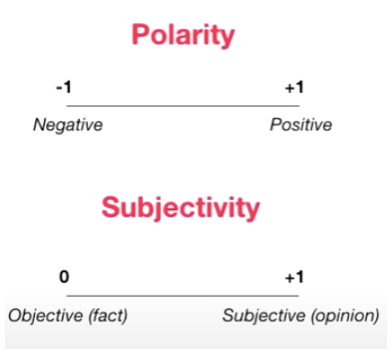

In [52]:
# try this sample text
from textblob import TextBlob
# this has a predefined library of sentimental words then analyzes the text

print(TextBlob("I love COMP3800.").sentiment)
print(TextBlob("I do not love COMP3800.").sentiment)
print(TextBlob("I don't love COMP3800.").sentiment)
print(TextBlob("I very love COMP3800.").sentiment)

Sentiment(polarity=0.5, subjectivity=0.6)
Sentiment(polarity=-0.25, subjectivity=0.6)
Sentiment(polarity=0.5, subjectivity=0.6)
Sentiment(polarity=0.65, subjectivity=0.78)


- *subjectivity score*: whether the word is classified as objective (fact) or subjective (opinion)
- *polarity*: whether the word is classified as positive or negative

In [55]:
# apply sentiment analysis on our project
# define method for calculating subjectivity score for each word
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity # for each text, return subjectivity score

# Create a function to get the polarity
def getPolarity(text):
    return  TextBlob(text).sentiment.polarity

# apply the functions to our example and add the scores as cols to pre-existing df of the tweet
df['Subjectivity'] = df['Tweet'].apply(getSubjectivity)
df['Polarity'] = df['Tweet'].apply(getPolarity)

print(df.shape)
df.head(5)

(133, 6)


,Date,User,Tweet,Subjectivity,Polarity,Date_only
0,2022-11-04 13:00:22+00:00,taylorswift13,UM. Looks like I’ll get to see more of your be...,0.555556,0.394444,2022-11-04
1,2022-11-01 12:24:21+00:00,taylorswift13,Feeling like the luckiest person alive to get ...,0.600000,0.316667,2022-11-01
2,2022-11-01 12:24:20+00:00,taylorswift13,I’m enchanted to announce my next tour: Taylor...,0.097222,0.000000,2022-11-01
3,2022-10-31 17:54:24+00:00,taylorswift13,10 out of 10 of the Hot 100??? On my 10th albu...,0.850000,0.250000,2022-10-31
4,2022-10-27 18:05:57+00:00,taylorswift13,Can I ask you a question… did you ever wonder ...,0.475000,0.300000,2022-10-27


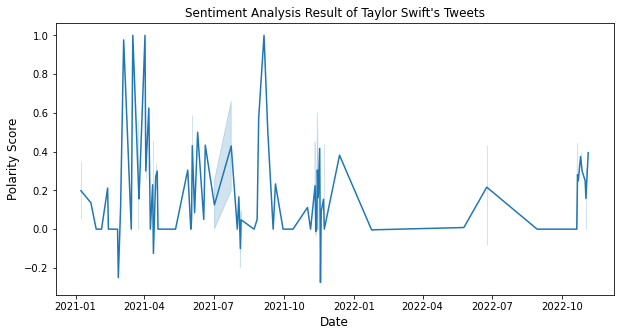

In [56]:
# visual example of polarity score
from datetime import datetime
df['Date_only'] = [x.date() for x in df['Date']]
df.head()

plt.figure(figsize=(10,5))
sns.lineplot(x = 'Date_only', y = 'Polarity', data = df)
plt.title("Sentiment Analysis Result of Taylor Swift's Tweets")
plt.ylabel('Polarity Score', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.show()